<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/tools/position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# index, stock volatility, posiiton

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import ast

class Stock:
  def __init__(self, code):
    self.code = code
    self.headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'}

  def get_price(self, start:int='20180501', interval='day'):
    url ='https://api.finance.naver.com/siseJson.naver?symbol=' + self.code + '&requestType=1&startTime=' \
    + start + '&endTime=' + str(datetime.datetime.now().date().strftime("%Y%m%d")) +  '&timeframe=' + interval

    result = requests.get(url)
    bs_obj = BeautifulSoup(result.content, "html.parser")
    b = bs_obj.get_text()
    for i in ['\n', '\t', "\\", ' ']:
      b = b.replace(i,'')

    data = np.array(ast.literal_eval(b)[1:])

    dic = {'Date':list(map(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'), data[:,0])), \
      'Open':np.array(data[:,1], float), 'High':np.array(data[:,2], float), 'Low':np.array(data[:,3], float),\
       'Close':np.array(data[:,4], float), 'Volume':np.array(data[:,5], float)}

    df = pd.DataFrame(data=dic)
    df = df.set_index('Date')
    return df

In [ ]:
# 3 years
now = datetime.datetime.now().date()
start_date = str(int(now.strftime("%Y")) - 3) + now.strftime("%m%d")

In [ ]:
stock = Stock('093380')
stock_df = stock.get_price(start_date)
stock_df['Change'] = stock_df['Close'][1:]/stock_df['Close'][:-1].values
stock_df = stock_df.dropna()

In [ ]:
index = Stock('KOSPI')
index_df = index.get_price(start_date)
index_df['Change'] = index_df['Close'][1:]/index_df['Close'][:-1].values
index_df = index_df.dropna()

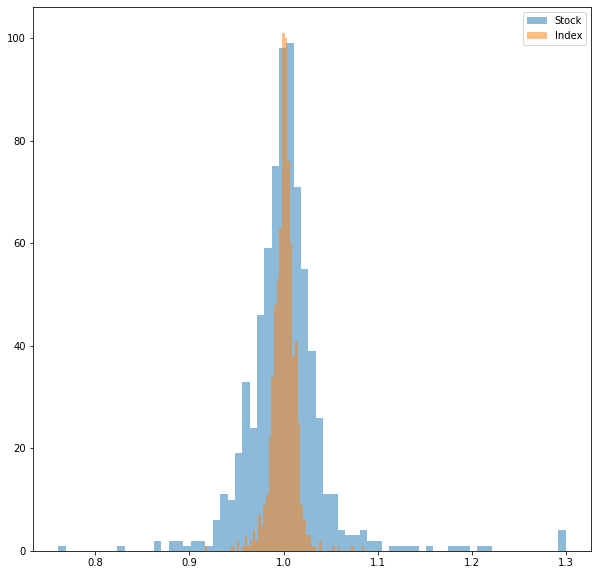

In [ ]:
# Var
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 10))
plt.hist(stock_df[np.isfinite(stock_df['Change'])]['Change'], bins= 'auto', alpha=0.5)
plt.hist(index_df[np.isfinite(index_df['Change'])]['Change'], bins= 'auto', alpha=0.5)
plt.legend(['Stock', 'Index'])
plt.show()

In [ ]:
print('Index')
print('lowest 5th percentile: ', round(np.percentile(index_df['Change'], 5), 5))
print('highest 5th percentile: ', round(np.percentile(index_df['Change'], 95), 5))

print('Stock')
print('lowest 5th percentile: ', round(np.percentile(stock_df['Change'], 5), 5))
print('highest 5th percentile: ', round(np.percentile(stock_df['Change'], 95), 5))

Index
lowest 5th percentile:  0.98108
highest 5th percentile:  1.01748
Stock
lowest 5th percentile:  0.94466
highest 5th percentile:  1.05264


In [ ]:
# resistance 
# If high > 25% --> high limit ?
len(stock_df[stock_df['Change'] > 1.28])/len(stock_df[stock_df['High']/stock_df['Open'] > 1.25])

0.6666666666666666

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-12-20,2505.0,3240.0,2505.0,3240.0,2519393.0,1.298597
2018-12-27,2930.0,3695.0,2880.0,3440.0,10048258.0,1.192374
2019-09-05,3140.0,3980.0,3140.0,3645.0,9304292.0,1.175806
2020-02-17,3050.0,3950.0,3050.0,3680.0,15388923.0,1.210526
2021-01-04,3305.0,4290.0,3290.0,4290.0,8350936.0,1.300000
2021-05-10,4600.0,5870.0,4545.0,5360.0,22985355.0,1.185841


In [ ]:
# beta


In [ ]:
!pip install yfinance
!pip install yahoofinancials

In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
vix = yf.download('^VIX')
snp = yf.download('^GSPC')
nasdaq = yf.download('^IXIC')